### Process Tiff Stack

In [1]:
import time
from pvd_io import *
from pvd_par import PVD
from pvd_metrics import data_summary
from IPython.display import clear_output

### Get data paths

In [2]:
# Get all tiff stacks and their paths
data_dir = 'pvd_data/'
min_file_size = 1e8  # 100 MB
datasets, sessions, files = scan_directories(data_dir, min_file_size)
print(f"Located {len(files)} tiff stacks")

Located 53 tiff stacks


### Batch Process Data

In [9]:
# Execute pipeline
for ii, file in enumerate(files):  # Slice like so to get a range of files[:1]
    clear_output(wait=True)

    # Set path
    data_path = 'pvd_data'
    results_path = 'pvd_analysis'
    dataset = datasets[ii]
    session = sessions[ii]
    output_path = f"{results_path}/{dataset}/{session}/"

    # Capture and display output
    output_capture = OutputCapture()
    sys.stdout = output_capture

    try:
        print(f"Processing tiff stack {ii}/{len(files)}")
        print(f"{datasets[ii]} {sessions[ii]}")
        pvd = PVD(data_path, dataset, session, file)
        pvd.run_pipeline()

        print(f"Saving data to drive...")
        pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=False, save_labeled_tiff=False)

    finally:
        sys.stdout = output_capture.original_stdout

    # Save cell output
    with open(f"{output_path}output.txt", 'w') as f:
        f.write(str(output_capture.get_output()))

    # Clear memory
    del pvd

    time.sleep(1)

# Create summary file recording MIP similarity between timepoints and segments matched
data_summary(files, datasets, sessions)

Processing tiff stack 52/53
DataSet04 expDS4_13
Starting pipeline.
Data loaded. Shape: (4, 103, 2048, 2048): 8.80 seconds
Data cropped. Shape: (4, 103, 2000, 2000): 5.07 seconds
Preprocessing complete: 68.12 seconds
Data skeletonized: 189.43 seconds
Number of tips per timepoint: [128, 143, 160, 217]
Number of knots per timepoint: [353, 350, 368, 459]
Outer segments found. Number of outer segments per timepoint: [41, 36, 33, 85]: 3.24 seconds
Matched 0 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [0, 0, 0, 0]: 0.08 seconds
Unmatched segments grouped: 5.50 seconds
All timepoints labeled successfully
Number of unique labels: 1
Processed data labeled: 24.28 seconds
Volume changes DataFrame generated: 24.74 seconds
Pipeline complete. Total time: 329.25 seconds
Saving data to drive...

Quality Score: 0.7406
Volume changes DataFrame saved to pvd_analysis/DataSet04/expDS4_13//segment_change.csv


### Single Stack

Starting pipeline.
Data loaded. Shape: (4, 92, 2044, 2042): 8.82 seconds
Data cropped. Shape: (4, 92, 2000, 2000): 4.59 seconds
Preprocessing complete: 64.24 seconds
Data skeletonized: 158.22 seconds
Number of tips per timepoint: [214, 186, 136, 98]
Number of knots per timepoint: [475, 452, 311, 246]
Outer segments found. Number of outer segments per timepoint: [130, 109, 78, 52]: 2.80 seconds
Matched 7 segments across all timepoints.
Segments matched. Number of matched segments per timepoint: [7, 7, 7, 7]: 0.41 seconds
Unmatched segments grouped: 4.99 seconds
All timepoints labeled successfully
Number of unique labels: 8
Processed data labeled: 21.48 seconds
Volume changes DataFrame generated: 22.54 seconds
Pipeline complete. Total time: 288.08 seconds
Saving data to drive...

Quality Score: 0.6528
Skeleton visualizations saved to pvd_analysis/DataSet00/exp240104_00_01_//visualizations
Outer segment visualizations saved to pvd_analysis/DataSet00/exp240104_00_01_//visualizations
Volume

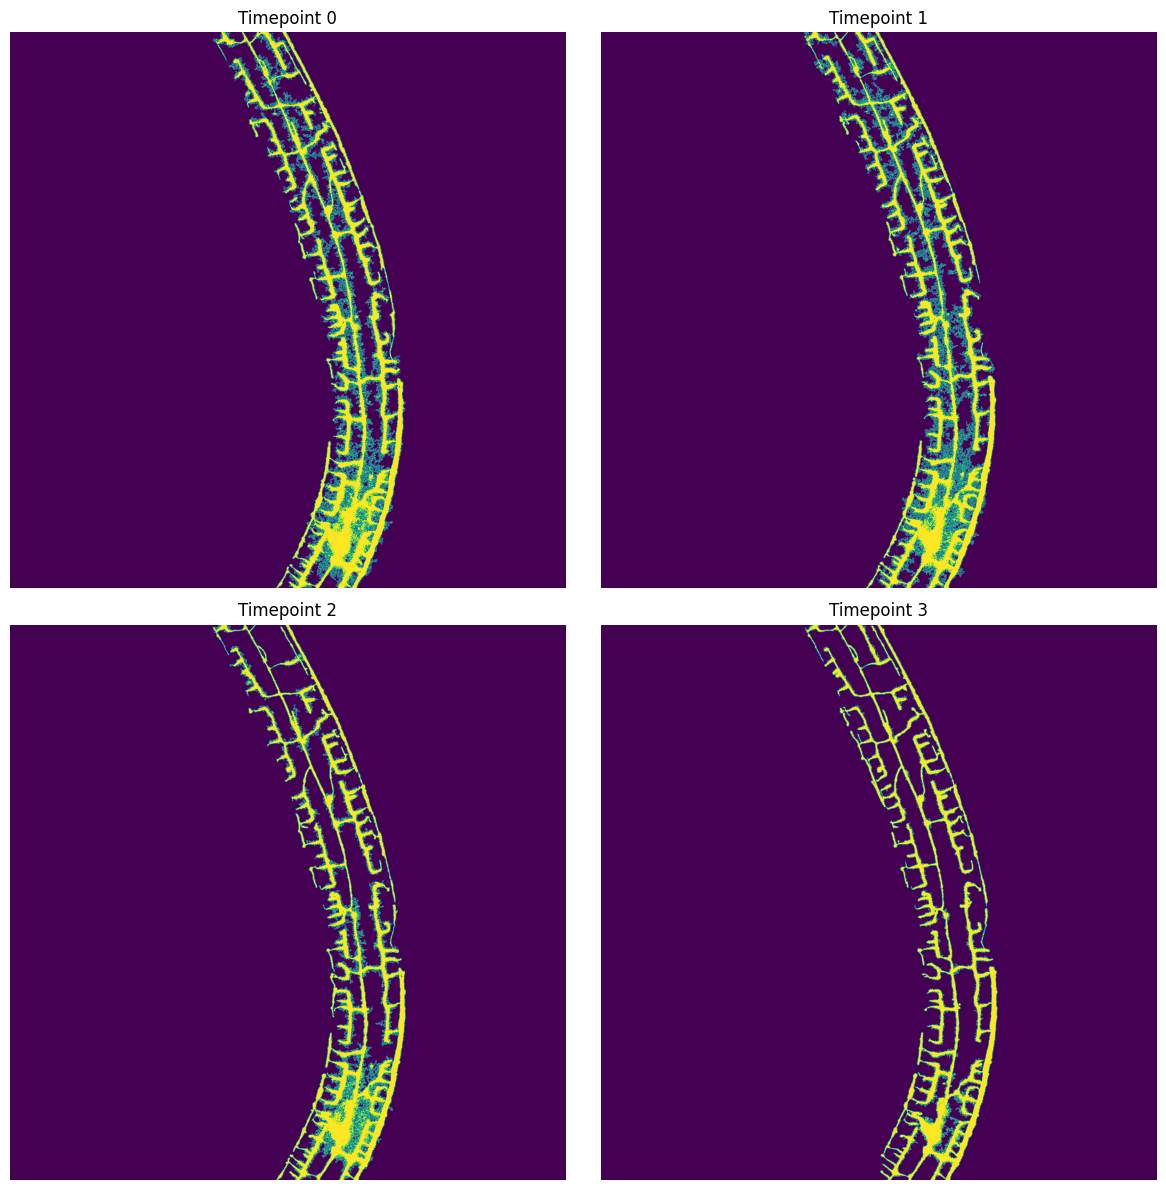

In [3]:
# Set path to zero-match file
data_path = 'pvd_data'
results_path = 'pvd_analysis'
dataset = 'DataSet00'
session = 'exp240104_00_01_'
file = 'exp240104_00_01.tif'
tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
output_path = f"{results_path}/{dataset}/{session}/"

# Capture and display output
output_capture = OutputCapture()
sys.stdout = output_capture

try:
    pvd = PVD(data_path, dataset, session, file)
    pvd.run_pipeline()

    print(f"Saving data to drive...")
    pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=True, save_labeled_tiff=False)

finally:
    sys.stdout = output_capture.original_stdout

# Save cell output
with open(f"{output_path}pipeline_log.txt", 'w') as f:
    f.write(str(output_capture.get_output()))

time.sleep(1)

In [11]:
# # Set path to original test file
# data_path = 'pvd_data'
# results_path = 'pvd_analysis'
# dataset = 'DataSet01'
# session = 'exp240202_01_E_'
# file = 'exp240202_01_E.tif'
# tiff_stack_path = f"{data_path}/{dataset}/{session}_/{file}"
# output_path = f"{results_path}/{dataset}/{session}/"

# # Process stack
# pvd = PVD(data_path, dataset, session, file)
# pvd.run_pipeline()

# # Save relevant numpy arrays
# print(f"Saving data to drive...")
# pvd.save_results(output_path, save_tiff=False, save_numpy=False, save_plotly=False, save_labeled_tiff=False)

# time.sleep(1)

### Matched Segment Summary

In [35]:
# # add a line to extract the quality score <-- add this to pvd_metrics.py
# import pandas as pd

# # Create a file with a tally of matched segments per tiff stack

# def data_summary(files, datasets, sessions, summary_file = "data_summary.txt"):
#     # Summary Report
#     for ii, file in enumerate(files):
#         results_path = 'pvd_analysis'
#         dataset = datasets[ii]
#         session = sessions[ii]
#         output_path = f"{results_path}/{dataset}/{session}/"

#         segment_csv = pd.read_csv(f"{output_path}segment_change.csv")
#         quality_csv = pd.read_csv(f"{output_path}mip_cosine_similarity.csv'")
#         csv_length = segment_csv.shape[1]-3  # Subtract 3 for index and core segment
#         quality_score = quality_csv.loc[5,'t1']  # Get avg. cosine similarity score from csv

#         with open(summary_file, 'a') as file:
#             file.write(f"{dataset} - {session} -- Segments: {csv_length}  Quality: {float(quality_score):.2f}\n")